In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../src")
import feature.molecule_dataset as molecule_dataset
import model.graph_adj_x_diffusion as graph_adj_x_diffusion
import model.graph_net as graph_net
import model.util as model_util
import torch
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
import rdkit
import IPython
import importlib

In [2]:
class OpenSmiles(object):

    def __init__(self):

        self.name = 'open_smiles'

    @staticmethod
    def get_smiles():

        smiles = {
            "1,1,1-trifluoroethane": "CC(F)(F)F",
            "1,1'-biphenyl": "C1(C2=CC=CC=C2)=CC=CC=C1",
            "1H-indene": "C1(CC=C2)=C2C=CC=C1",
            "1H-pyrrole": "[NH]1CCCC1",
            "2-butyne": "CC#CC",
            "2-ethyl-1-butanol": "CCC(CC)CO",
            "2-methylpenta-2,3-diene": "CC=C=C(C)C",
            "(E)-1,2-dimethyldiazene": "C/N=N/C",
            "N,N-dimethylacetamide": "CC(N(C)C)=O",
            "N-methylpropan-2-imine": "C/C(C)=N/C",
            "(Z)-N,N,N'-trimethylacetimidamide": "C/C(N(C)C)=N/C",
            "acetic anydride": "CC(=O)OC(=O)C",
            "acyl bromide": "C(=O)Br",
            "acyl chloride": "C(=O)Cl",
            "acyl fluoride": "C(=O)F",
            "acyl iodide": "C(=O)I",
            "aldehyde": "CC=O",
            "amide": "C(=O)N",
            "amino": "*N",
            "anthracene": "C12=CC=CC=C1C=C3C(C=CC=C3)=C2",
            "azide": "C([N-][N+]#N)",
            "benzene": "C1=CC=CC=C1",
            "benzene thiol": "C1=CC=C(C=C1)S",
            "bicyclohexyl": "C1CCCCC1C1CCCCC1",
            "bromine": "Br",
            "but-1-ene": "CCC=C",
            "but-1-yne": "CCC#C",
            "carbon dioxide": "O=C=O",
            "carboxylic acid": "C(=O)O",
            "chlorine": "Cl",
            "chloromethyl methyl ether": "COCCl",
            "cyclobutadiene": "C1=CC=C1",
            "cyclobutane": "C1CCC1",
            "cycloheptane": "C1CCCCCC1",
            "cyclohexane": "C1CCCCC1",
            "cyclohexa-1,3-diene": "C1=CCCC=C1",
            "cyclohexa-1,4-diene": "C1=CCC=CC1",
            "cyclohexene": "C=1CCCCC=1",
            "cyclopentane": "C1CCCC1",
            "cyclopenta-1,3-diene": "C1=CCC=C1",
            "cyclopropane": "C1CC1",
            "cyclopropene": "C1=CC1",
            "deuteroethane": "[2H][CH2]C",
            "dimethyl ether": "COC",
            "diethyl ether": "CCOCC",
            "diisopropyl ether": "CC(C)OC(C)C",
            "diamond": "C&1&1&1&1",
            "diazomethane": "C=[N+]=[N-]",
            "diammonium thiosulfate": "[NH4+].[NH4+].[O-]S(=O)(=O)[S-]",
            "enamine": "N",
            "ethane": "CC",
            "ethanethiol": "CCS",
            "ethanol": "CCO",
            "ethene": "C=C",
            "ether": "COC",
            "ester": "C(=O)OC",
            "fluorine": "F",
            "formaldehyde": "C=O",
            "furan": "C1OC=CC=1",
            "graphite": "C&1&1&1",
            "hydrogen cyanide": "C#N",
            "hydroxide": "[OH-]",
            "hydroxyl amine": "NO",
            "indane": "C1=CC=CC(CCC2)=C12",
            "ketone": "CC(=O)C",
            "methane": "C",
            "methanethiol": "CS",
            "methyl acetate": "CC(OC)=O",
            "methyl pyrrole": "CN1CCCC1",
            "methyl tert-butyl ether": "CC(C)(C)OC",
            "naphthalene": "C12=CC=CC=C1C=CC=C2",
            "nitro": "[N+](=O)[O-]",
            "nitromethane": "C[N+]([O-])=O",
            "pentalene": "C12=CC=CC1=CC=C2",
            "perhydroisoquinoline": "N1CC2CCCC2CC1",
            "phenol": "OC1CCCCC1",
            "phenyl": "C=1(C=CC=CC1)",
            "polystyrene": "c1ccccc1C&1&1",
            "primary alcohol": "O",
            "primary amine": "N",
            "propan-2-one": "CC(C)=O",
            "propanol": "CCC=O",
            "prop-1-ene": "CC=C",
            "prop-1-yne": "CC#C",
            "pyridine": "N1CCCCC1",
            "pyridine-n-oxide": "O=N1CCCCC1",
            "secondary amine": "NC",
            "spiro[5.5]undecane": "C12(CCCCC1)CCCCC2",
            "sulfoxide": "S(=O)(=O)",
            "tetramethylammonium": "C[N+](C)(C)C",
            "thiol": "S",
            "thiosulfate": "OS(=O)(=S)O",
            "trimethylamine": "CN(C)C",
            "triphenylene": "C1(C=CC=C2)=C2C(C=CC=C3)=C3C4=C1C=CC=C4",
        }

        return smiles

    @staticmethod
    def get_smarts():

        smarts = {
            "acetic anydride": "[CX3](=[OX1])[OX2][CX3](=[OX1])",
            "acetylenic carbon": "[$([CX2]#C)]",
            "acyl bromide": "[CX3](=[OX1])[Br]",
            "acyl chloride": "[CX3](=[OX1])[Cl]",
            "acyl fluoride": "[CX3](=[OX1])[F]",
            "acyl iodide": "[CX3](=[OX1])[I]",
            "aldehyde": "[CX3H1](=O)[#6]",
            "alkane": "[CX4]",
            "allenic carbon": "[$([CX2](=C)=C)]",
            "amide": "[NX3][CX3](=[OX1])[#6]",
            "amidium": "[NX3][CX3]=[NX3+]",
            "amino acid": "[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]",
            "azide": "[$(-[NX2-]-[NX2+]#[NX1]),$(-[NX2]=[NX2+]=[NX1-])]",
            "azo nitrogen": "[NX2]=N",
            "azole": "[$([nr5]:[nr5,or5,sr5]),$([nr5]:[cr5]:[nr5,or5,sr5])]",
            "azoxy nitrogen": "[$([NX2]=[NX3+]([O-])[#6]),$([NX2]=[NX3+0](=[O])[#6])]",
            "diazene": "[NX2]=[NX2]",
            "diazo nitrogen": "[$([#6]=[N+]=[N-]),$([#6-]-[N+]#[N])]",
            "bromine": "[Br]",
            "carbamate": "[NX3,NX4+][CX3](=[OX1])[OX2,OX1-]",
            "carbamic ester": "[NX3][CX3](=[OX1])[OX2H0]",
            "carbamic acid": "[NX3,NX4+][CX3](=[OX1])[OX2H,OX1-]",
            "carbo azosulfone": "[SX4](C)(C)(=O)=N",
            "carbo thiocarboxylate": "[S-][CX3](=S)[#6]",
            "carbo thioester": "S([#6])[CX3](=O)[#6]",
            "carboxylate ion": "[CX3](=O)[O-]",
            "carbonic acid": "[CX3](=[OX1])(O)O",
            "carbonic ester": "C[OX2][CX3](=[OX1])[OX2]C",
            "carbonyl group": "[$([CX3]=[OX1]),$([CX3+]-[OX1-])]",
            "carbonyl with carbon": "[CX3](=[OX1])C",
            "carbonyl with nitrogen": "[OX1]=CN",
            "carbonyl with oxygen": "[CX3](=[OX1])O",
            "carboxylic acid": "[CX3](=O)[OX1H0-,OX2H1]",
            "chlorine": "[Cl]",
            "cyanamide": "[NX3][CX2]#[NX1]",
            "di sulfide": "[#16X2H0][#16X2H0]",
            "enamine": "[NX3][CX3]=[CX3]",
            "enol": "[OX2H][#6X3]=[#6]",
            "ester": "[#6][CX3](=O)[OX2H0][#6]",
            "ether": "[OD2]([#6])[#6]",
            "fluorine": "[F]",
            "hydrogen": "[H]",
            "hydrazine": "[NX3][NX3]",
            "hydrazone": "[NX3][NX2]=[*]",
            "hydroxyl": "[OX2H]",
            "hydroxyl in alcohol": "[#6][OX2H]",
            "hydroxyl in carboxylic acid": "[OX2H][CX3]=[OX1]",
            "isonitrile": "[CX1-]#[NX2+]",
            "imide": "[CX3](=[OX1])[NX3H][CX3](=[OX1])",
            "imine": "[CX3;$([C]([#6])[#6]),$([CH][#6])]=[NX2][#6]",
            "iminium": "[NX3+]=[CX3]",
            "ketone": "[CX3]=[OX1]",
            "peroxide": "[OX2,OX1-][OX2,OX1-]",
            "phenol": "[OX2H][cX3]:[c]",
            "phosphoric acid": "[$(P(=[OX1])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)]),$([P+]([OX1-])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)])]",
            "phosphoric ester": "[$(P(=[OX1])([OX2][#6])([$([OX2H]),$([OX1-]),$([OX2][#6])])[$([OX2H]),$([OX1-]),$([OX2][#6]),$([OX2]P)]),$([P+]([OX1-])([OX2][#6])([$([OX2H]),$([OX1-]),$([OX2][#6])])[$([OX2H]),$([OX1-]),$([OX2][#6]),$([OX2]P)])]",
            "primary alcohol": "[OX2H]",
            "primary amine": "[NX3;H2;!$(NC=[!#6]);!$(NC#[!#6])][#6]",
            "proton": "[H+]",
            "mono sulfide": "[#16X2H0][!#16]",
            "nitrate": "[$([NX3](=[OX1])(=[OX1])O),$([NX3+]([OX1-])(=[OX1])O)]",
            "nitrile": "[NX1]#[CX2]",
            "nitro": "[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]",
            "nitroso": "[NX2]=[OX1]",
            "n-oxide": "[$([#7+][OX1-]),$([#7v5]=[OX1]);!$([#7](~[O])~[O]);!$([#7]=[#7])]",
            "secondary amine": "[NX3;H2,H1;!$(NC=O)]",
            "sulfate": "[$([#16X4](=[OX1])(=[OX1])([OX2H,OX1H0-])[OX2][#6]),$([#16X4+2]([OX1-])([OX1-])([OX2H,OX1H0-])[OX2][#6])]",
            "sulfamate": "[$([#16X4]([NX3])(=[OX1])(=[OX1])[OX2][#6]),$([#16X4+2]([NX3])([OX1-])([OX1-])[OX2][#6])]",
            "sulfamic acid": "[$([#16X4]([NX3])(=[OX1])(=[OX1])[OX2H,OX1H0-]),$([#16X4+2]([NX3])([OX1-])([OX1-])[OX2H,OX1H0-])]",
            "sulfenic acid": "[#16X2][OX2H,OX1H0-]",
            "sulfenate": "[#16X2][OX2H0]",
            "sulfide": "[#16X2H0]",
            "sulfonate": "[$([#16X4](=[OX1])(=[OX1])([#6])[OX2H0]),$([#16X4+2]([OX1-])([OX1-])([#6])[OX2H0])]",
            "sulfinate": "[$([#16X3](=[OX1])[OX2H0]),$([#16X3+]([OX1-])[OX2H0])]",
            "sulfinic acid": "[$([#16X3](=[OX1])[OX2H,OX1H0-]),$([#16X3+]([OX1-])[OX2H,OX1H0-])]",
            "sulfonamide": "[$([#16X4]([NX3])(=[OX1])(=[OX1])[#6]),$([#16X4+2]([NX3])([OX1-])([OX1-])[#6])]",
            "sulfone": "[$([#16X4](=[OX1])(=[OX1])([#6])[#6]),$([#16X4+2]([OX1-])([OX1-])([#6])[#6])]",
            "sulfonic acid": "[$([#16X4](=[OX1])(=[OX1])([#6])[OX2H,OX1H0-]),$([#16X4+2]([OX1-])([OX1-])([#6])[OX2H,OX1H0-])]",
            "sulfoxide": "[$([#16X3](=[OX1])([#6])[#6]),$([#16X3+]([OX1-])([#6])[#6])]",
            "sulfur": "[#16!H0]",
            "sulfuric acid ester": "[$([SX4](=O)(=O)(O)O),$([SX4+2]([O-])([O-])(O)O)]",
            "sulfuric acid diester": "[$([#16X4](=[OX1])(=[OX1])([OX2][#6])[OX2][#6]),$([#16X4](=[OX1])(=[OX1])([OX2][#6])[OX2][#6])]",
            "thioamide": "[NX3][CX3]=[SX1]",
            "thiol": "[#16X2H]",
            "vinylic carbon": "[$([CX3]=[CX3])]",
        }

        return smarts

In [3]:
# Plotting defaults
font_list = font_manager.findSystemFonts(fontpaths=["/gstore/home/tsenga5/modules/fonts"])
for font in font_list:
    font_manager.fontManager.addfont(font)
plot_params = {
    "figure.titlesize": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "font.size": 13,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold",
    "svg.fonttype": "none"
}
plt.rcParams.update(plot_params)

In [4]:
# Define device
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"

### Define constants and paths

In [5]:
models_base_path = "/gstore/scratch/u/tsenga5/branched_diffusion/models/trained_models/"

# model_path = os.path.join(models_base_path, "zinc250k_continuous_cycle_0_1/7/last_ckpt.pth")
# model_path = os.path.join(models_base_path, "zinc250k_continuous_num_cycles_b0.15/2/last_ckpt.pth")
model_path = os.path.join(models_base_path, "zinc250k_continuous_elements_b0.15/3/last_ckpt.pth")

In [6]:
classes = [0, 1]
branch_defs = [((0, 1), 0.15, 1), ((0,), 0, 0.15), ((1,), 0, 0.15)]

In [7]:
# dataset = molecule_dataset.ZINCDataset(label_method="num_cycles", nums_to_label=[0, 1])
dataset = molecule_dataset.ZINCDataset(label_method="elements")

# Limit classes
inds = np.isin(dataset.target, classes)
dataset.all_smiles = dataset.all_smiles[inds]
dataset.target = dataset.target[inds]

data_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)
input_shape = next(iter(data_loader))[0].shape[1:]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249455/249455 [00:49<00:00, 5066.78it/s]


In [8]:
sde = graph_adj_x_diffusion.AXJointSDE(0.1, 1, 0.2, 1, input_shape)

t_limit = 1

In [9]:
# out_path = "/gstore/home/tsenga5/branched_diffusion/figures/zinc250k_examples/elements"

# os.makedirs(out_path, exist_ok=True)

### Import the model

In [10]:
# TODO: this is currently rather inefficient; a decision-tree-style structure
# would be better

def class_time_to_branch(c, t):
    """
    Given a class and a time (both scalars), return the
    corresponding branch index.
    """
    for i, branch_def in enumerate(branch_defs):
        if c in branch_def[0] and t >= branch_def[1] and t <= branch_def[2]:
            return i
    raise ValueError("Undefined class and time")
        
def class_time_to_branch_tensor(c, t):
    """
    Given tensors of classes and a times, return the
    corresponding branch indices as a tensor.
    """
    return torch.tensor([
        class_time_to_branch(c_i, t_i) for c_i, t_i in zip(c, t)
    ], device=DEVICE)

In [11]:
model = model_util.load_model(
    graph_net.GraphJointNetwork,
    model_path
).to(DEVICE)

### Sample molecules

In [12]:
ATOM_SYMBOLS = ["C", "N", "O", "F", "S", "Cl", "Br", "I", "P"]
BOND_TYPES = [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.DOUBLE, rdkit.Chem.rdchem.BondType.TRIPLE]

def samples_to_adj_x(samps):
    """
    Given a B x M x (M + D) array of adjacency matrices and node features,
    discretizes them and returns the adjacency matrices (B x M x M) and
    node features (B x M x D),
    """
    s = samps.shape[1]
    adj, x = samps[:, :, :s], samps[:, :, s:]
    
    # Discretize
    adj[adj < 0.5] = 0
    adj[(adj >= 0.5) & (adj < 1.5)] = 1
    adj[(adj >= 1.5) & (adj < 2.5)] = 2
    adj[adj >= 2.5] = 3
    adj = np.triu(adj, k=1)
    adj = adj + np.swapaxes(adj, 1, 2)
    x[x < 0.5] = 0
    x[x >= 0.5] = 1
    adj, x = adj.astype(int), x.astype(int)
    return adj, x

def samples_to_rdkmols(adj, x, flags):
    """
    Given a B x M x M adjacency matrix batch and B x M x D node feature
    batch, and a B x M binary array of flags (all NumPy arrays),
    converts them to RDKit molecule objects.
    """
    mol_sizes = np.sum(flags, axis=1)
    atomic_nums = np.argmax(x, axis=2)
    
    mols = []
    for i in range(len(adj)):
        size = mol_sizes[i]
        a, atoms = adj[i][:size][:, :size], atomic_nums[i][:size]
        mol = rdkit.Chem.RWMol()
        
        for atom in atoms:
            mol.AddAtom(rdkit.Chem.Atom(ATOM_SYMBOLS[atom]))
            
        for u, v in zip(*np.nonzero(np.triu(a, k=1))):
            mol.AddBond(int(u), int(v), BOND_TYPES[a[u, v] - 1])
        
        mol.UpdatePropertyCache(strict=False)  # Set valences
        
        mols.append(mol)
    return mols

def plot_molecule(mol):
    mc = rdkit.Chem.Mol(mol.ToBinary())
    rdkit.Chem.Kekulize(mc)
    
    drawer = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DSVG(450, 150)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return IPython.display.SVG(svg.replace("svg:",""))

In [13]:
# samples = {}
# num_samples_per_class = 32
# for class_to_sample in classes:
#     # Sample some initial node flags
#     inds = np.random.choice(np.where(dataset.target == class_to_sample)[0], size=num_samples_per_class, replace=True)
#     batch = torch.stack([dataset[i][0] for i in inds], dim=0)
#     adj = batch[:, :, :batch.shape[1]]
#     sampled_flags = graph_net.node_flags(adj)
    
#     sample = graph_adj_x_diffusion.generate_continuous_branched_samples(
#         model, sde, class_to_sample, class_time_to_branch_tensor,
#         sampled_flags, num_samples=num_samples_per_class, t_limit=t_limit,
#         num_steps=1000, verbose=True
#     ).cpu().numpy()
#     samples[class_to_sample] = sample

In [14]:
# # Convert to molecule objects
# mol_samples = {}
# for class_to_sample in classes:
#     samps = samples[class_to_sample]
    
#     # Separate and discretize
#     adj, x = samples_to_adj_x(samps)
    
#     # Convert
#     mol_samples[class_to_sample] = samples_to_rdkmols(adj, x, sampled_flags.cpu().numpy().astype(int))

In [15]:
# for class_to_sample in classes:
#     print(class_to_sample)
#     for mol in mol_samples[class_to_sample]:
#         IPython.display.display(plot_molecule(mol))
#         print(rdkit.Chem.MolToSmiles(mol))

### Transmutation

In [16]:
class_1, class_2 = 0, 1
branch_time = branch_defs[min(
    range(len(branch_defs)),
    key=(lambda i: branch_defs[i][1] if (
        class_1 in branch_defs[i][0] and class_2 in branch_defs[i][0]
    ) else float("inf"))
)][1]

orig_1 = torch.stack([
    dataset[i][0].to(DEVICE) for i in 
    np.random.choice(np.where(dataset.target == class_1)[0], size=200, replace=False)
])
orig_2 = torch.stack([
    dataset[i][0].to(DEVICE) for i in 
    np.random.choice(np.where(dataset.target == class_2)[0], size=200, replace=False)
])
orig_1_adj = orig_1[:, :, :orig_1.shape[1]]
orig_1_flags = graph_net.node_flags(orig_1_adj)
orig_2_adj = orig_2[:, :, :orig_2.shape[1]]
orig_2_flags = graph_net.node_flags(orig_2_adj)

time_steps = 10
all_t = np.linspace(0, branch_time, time_steps)
forward_1_to_2 = np.empty((len(all_t),) + orig_1.shape)
backward_1_to_2 = np.empty((len(all_t) - 1,) + orig_1.shape)
forward_2_to_1 = np.empty((len(all_t),) + orig_2.shape)
backward_2_to_1 = np.empty((len(all_t) - 1,) + orig_2.shape)
for t_i, t in enumerate(all_t):
    if t_i == 0:
        forward_1_to_2[t_i], forward_2_to_1[t_i] = orig_1.cpu().numpy(), orig_2.cpu().numpy()
    else:
        forward_1_to_2[t_i] = sde.forward(
            orig_1, torch.ones(len(orig_1)).to(DEVICE) * t
        )[0].cpu().numpy()
        forward_2_to_1[t_i] = sde.forward(
            orig_2, torch.ones(len(orig_2)).to(DEVICE) * t
        )[0].cpu().numpy()

all_t_flip = np.flip(all_t)
last_1_to_2 = torch.tensor(forward_1_to_2[-1]).to(DEVICE).float()
last_2_to_1 = torch.tensor(forward_2_to_1[-1]).to(DEVICE).float()
for t_i in range(len(all_t_flip) - 1):
    last_1_to_2 = graph_adj_x_diffusion.generate_continuous_branched_samples(
        model, sde, class_2, class_time_to_branch_tensor,
        orig_1_flags, t_limit=all_t_flip[t_i], t_start=all_t_flip[t_i + 1],
        num_samples=orig_1.shape[0], initial_samples=last_1_to_2,
        num_steps=50
    )
    backward_1_to_2[t_i] = last_1_to_2.cpu().numpy()

    last_2_to_1 = graph_adj_x_diffusion.generate_continuous_branched_samples(
        model, sde, class_1, class_time_to_branch_tensor,
        orig_2_flags, t_limit=all_t_flip[t_i], t_start=all_t_flip[t_i + 1],
        num_samples=orig_2.shape[0], initial_samples=last_2_to_1,
        num_steps=50
    )
    backward_2_to_1[t_i] = last_2_to_1.cpu().numpy()

orig_1, orig_2 = orig_1.cpu().numpy(), orig_2.cpu().numpy()
before_1_to_2, after_1_to_2 = forward_1_to_2[0], backward_1_to_2[-1]
before_2_to_1, after_2_to_1 = forward_2_to_1[0], backward_2_to_1[-1]

In [17]:
# Convert to molecule objects
before_1_to_2_adj, before_1_to_2_x = samples_to_adj_x(before_1_to_2)
before_1_to_2_mols = samples_to_rdkmols(before_1_to_2_adj, before_1_to_2_x, orig_1_flags.cpu().numpy().astype(int))
after_1_to_2_adj, after_1_to_2_x = samples_to_adj_x(after_1_to_2)
after_1_to_2_mols = samples_to_rdkmols(after_1_to_2_adj, after_1_to_2_x, orig_1_flags.cpu().numpy().astype(int))
before_2_to_1_adj, before_2_to_1_x = samples_to_adj_x(before_2_to_1)
before_2_to_1_mols = samples_to_rdkmols(before_2_to_1_adj, before_2_to_1_x, orig_2_flags.cpu().numpy().astype(int))
after_2_to_1_adj, after_2_to_1_x = samples_to_adj_x(after_2_to_1)
after_2_to_1_mols = samples_to_rdkmols(after_2_to_1_adj, after_2_to_1_x, orig_2_flags.cpu().numpy().astype(int))

In [18]:
# Counting rings
def count_rings(mol):
    rdkit.Chem.rdmolops.FastFindRings(mol)
    return len(mol.GetRingInfo().AtomRings())
before_1_to_2_rings = sum(count_rings(mol) > 0 for mol in before_1_to_2_mols)
after_1_to_2_rings = sum(count_rings(mol) > 0 for mol in after_1_to_2_mols)
before_2_to_1_rings = sum(count_rings(mol) > 0 for mol in before_2_to_1_mols)
after_2_to_1_rings = sum(count_rings(mol) > 0 for mol in after_2_to_1_mols)

print(before_1_to_2_rings, after_1_to_2_rings, before_2_to_1_rings, after_2_to_1_rings)

200 198 199 199


In [19]:
# Counting halogens
def count_halogens(mol):
    return len({"F", "Cl", "Br", "I"} & set([a.GetSymbol() for a in mol.GetAtoms()]))
before_1_to_2_hals = sum(count_halogens(mol) > 0 for mol in before_1_to_2_mols)
after_1_to_2_hals = sum(count_halogens(mol) > 0 for mol in after_1_to_2_mols)
before_2_to_1_hals = sum(count_halogens(mol) > 0 for mol in before_2_to_1_mols)
after_2_to_1_hals = sum(count_halogens(mol) > 0 for mol in after_2_to_1_mols)

print(before_1_to_2_hals, after_1_to_2_hals, before_2_to_1_hals, after_2_to_1_hals)

0 20 200 0


In [20]:
functional_groups = {}
open_smiles = OpenSmiles()
for key, s in open_smiles.get_smiles().items():
    functional_groups[key] = rdkit.Chem.MolFromSmiles(s)
for key, s in open_smiles.get_smarts().items():
    functional_groups[key] = rdkit.Chem.MolFromSmarts(s)
    
# Filter for only those with non-None pattern
functional_groups = {
    key : mol for key, mol in functional_groups.items() if mol #and set([a.GetSymbol() for a in mol.GetAtoms()]) != {"C"}
}

[15:39:32] SMILES Parse Error: syntax error while parsing: C&1&1&1&1
[15:39:32] SMILES Parse Error: Failed parsing SMILES 'C&1&1&1&1' for input: 'C&1&1&1&1'
[15:39:32] SMILES Parse Error: syntax error while parsing: C&1&1&1
[15:39:32] SMILES Parse Error: Failed parsing SMILES 'C&1&1&1' for input: 'C&1&1&1'
[15:39:32] SMILES Parse Error: syntax error while parsing: c1ccccc1C&1&1
[15:39:32] SMILES Parse Error: Failed parsing SMILES 'c1ccccc1C&1&1' for input: 'c1ccccc1C&1&1'
[15:39:32] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:39:32] SMARTS Parse Error: syntax error while parsing: [$(-[NX2-]-[NX2+]#[NX1])_100,$(-[NX2]=[NX2+]=[NX1-])_101]
[15:39:32] SMARTS Parse Error: Failed parsing SMARTS '[$(-[NX2-]-[NX2+]#[NX1])_100,$(-[NX2]=[NX2+]=[NX1-])_101]' for input: '[$(-[NX2-]-[NX2+]#[NX1]),$(-[NX2]=[NX2+]=[NX1-])]'


In [21]:
def quantify_match(mol_1, mol_2):
    mol_1_keys, mol_2_keys = set(), set()
    for fg_key, fg_pattern in functional_groups.items():
        if mol_1.GetSubstructMatches(fg_pattern):
            mol_1_keys.add(fg_key)
        if mol_2.GetSubstructMatches(fg_pattern):
            mol_2_keys.add(fg_key)
    return len(mol_1_keys & mol_2_keys) / len(mol_1_keys | mol_2_keys)

ious_1_to_2 = [quantify_match(before_1_to_2_mols[i], after_1_to_2_mols[i]) for i in range(len(before_1_to_2_mols))]
ious_1_to_2_baseline = [quantify_match(before_1_to_2_mols[i], before_2_to_1_mols[i]) for i in range(len(before_1_to_2_mols))]
ious_2_to_1 = [quantify_match(before_2_to_1_mols[i], after_2_to_1_mols[i]) for i in range(len(before_2_to_1_mols))]
ious_2_to_1_baseline = [quantify_match(before_2_to_1_mols[i], before_1_to_2_mols[i]) for i in range(len(before_2_to_1_mols))]

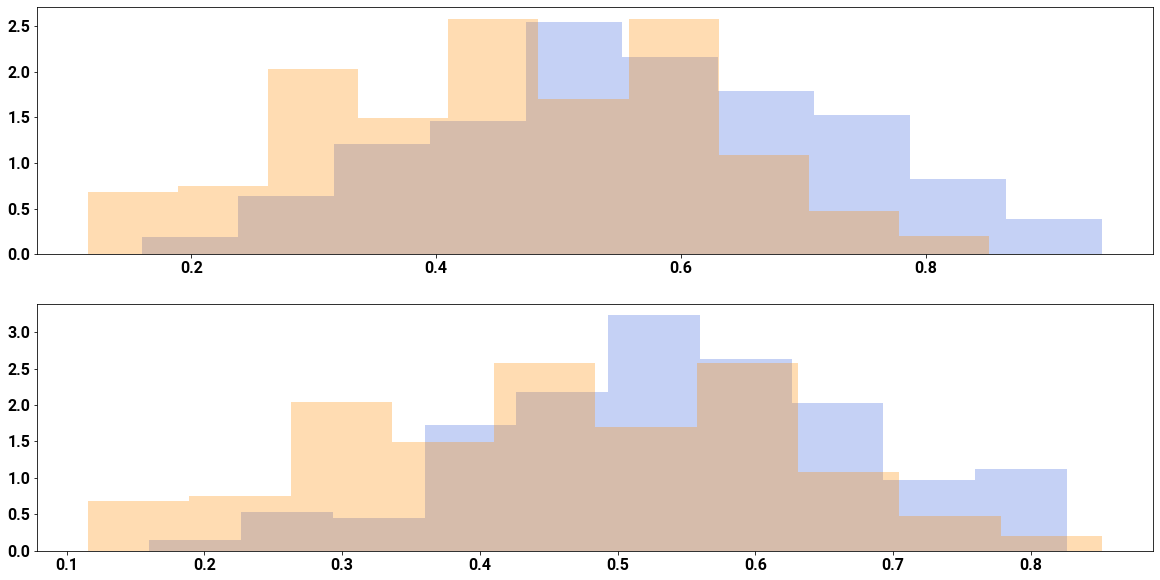

In [22]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))
ax[0].hist(ious_1_to_2, bins=10, density=True, alpha=0.3, color="royalblue")
ax[0].hist(ious_1_to_2_baseline, bins=10, density=True, alpha=0.3, color="darkorange")
ax[1].hist(ious_2_to_1, bins=10, density=True, alpha=0.3, color="royalblue")
ax[1].hist(ious_2_to_1_baseline, bins=10, density=True, alpha=0.3, color="darkorange")
plt.show()

In [23]:
print(scipy.stats.ttest_rel(ious_1_to_2, ious_1_to_2_baseline, alternative="greater"))
print(scipy.stats.ttest_rel(ious_2_to_1, ious_2_to_1_baseline, alternative="greater"))

Ttest_relResult(statistic=8.137885733314302, pvalue=2.1487095620711945e-14)
Ttest_relResult(statistic=6.444770143925278, pvalue=4.2770850966889164e-10)


In [24]:
import tqdm
def mol_to_canon_smiles(mol):
    return rdkit.Chem.MolToSmiles(mol)

all_dataset_smiles = set([
    mol_to_canon_smiles(rdkit.Chem.MolFromSmiles(s)) for s in tqdm.notebook.tqdm(dataset.all_smiles)
])

  0%|          | 0/249455 [00:00<?, ?it/s]

In [25]:
nonunique_1_to_2 = [
    mol_to_canon_smiles(mol) in all_dataset_smiles for mol in after_1_to_2_mols
]
nonunique_2_to_1 = [
    mol_to_canon_smiles(mol) in all_dataset_smiles for mol in after_2_to_1_mols
]
print(sum(nonunique_1_to_2), sum(nonunique_2_to_1))

0 0


In [26]:
import rdkit.Chem.AllChem
def get_fingerprints(mols, radius=2, nBits=2048):
    """
    For N molecule objects, returns an N x D NumPy array of fingerprints.
    """
    fps = [
        rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(m, radius=radius, nBits=nBits)
        for m in mols
    ]
    
    fp_arrs = []
    for fp in fps:
        arr = np.zeros((1,))
        rdkit.DataStructs.cDataStructs.ConvertToNumpyArray(fp, arr)
        fp_arrs.append(arr)
    return np.stack(fp_arrs)

import sklearn.metrics
def fingerprints_to_distances(fps, metric="dice"):
    matrix = sklearn.metrics.pairwise_distances(fps, metric=metric)
    return matrix[np.triu_indices(matrix.shape[0], k=1)]

In [27]:
after_1_to_2_fps = get_fingerprints(after_1_to_2_mols)
after_2_to_1_fps = get_fingerprints(after_2_to_1_mols)
before_1_to_2_fps = get_fingerprints(before_1_to_2_mols)
before_2_to_1_fps = get_fingerprints(before_2_to_1_mols)

In [28]:
r = {}
for d in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "braycurtis", "canberra", "chebyshev", "correlation", "dice", "hamming", "jaccard", "kulsinski", "mahalanobis", "minkowski", "rogerstanimoto", "russellrao", "seuclidean", "sokalmichener", "sokalsneath", "sqeuclidean", "yule"]:
    after_1_to_2_dists = fingerprints_to_distances(after_1_to_2_fps, metric=d)
    after_2_to_1_dists = fingerprints_to_distances(after_2_to_1_fps, metric=d)
    before_1_to_2_dists = fingerprints_to_distances(before_1_to_2_fps, metric=d)
    before_2_to_1_dists = fingerprints_to_distances(before_2_to_1_fps, metric=d)
    
    p_1_to_2 = scipy.stats.ttest_ind(after_1_to_2_dists, before_2_to_1_dists)[1]
    p_2_to_1 = scipy.stats.ttest_ind(after_2_to_1_dists, before_1_to_2_dists)[1]
    
    r[d] = np.mean(after_2_to_1_dists) - np.mean(before_1_to_2_dists)
    r[d] = p_2_to_1

/local/13718025/ipykernel_903/3639525187.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_1_to_2 = scipy.stats.ttest_ind(after_1_to_2_dists, before_2_to_1_dists)[1]
/local/13718025/ipykernel_903/3639525187.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_2_to_1 = scipy.stats.ttest_ind(after_2_to_1_dists, before_1_to_2_dists)[1]
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  wa

LinAlgError: Singular matrix

In [29]:
smiles_list = dataset.all_smiles[(dataset.target == 1).cpu().numpy()].values

vals = []
for _ in tqdm.notebook.trange(100):
    sample = np.random.choice(smiles_list, size=len(after_1_to_2_mols), replace=False)
    mols = [rdkit.Chem.MolFromSmiles(s) for s in sample]
    fps = get_fingerprints(mols)
    vals.append(fingerprints_to_distances(fps))
vals = np.stack(vals)

  0%|          | 0/100 [00:00<?, ?it/s]

/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008

/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008

/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008

In [33]:
np.mean(vals, axis=1)

array([0.77335954, 0.77452366, 0.774529  , 0.77384216, 0.7762594 ,
       0.77113662, 0.7724027 , 0.76819012, 0.77694891, 0.78016068,
       0.77374462, 0.7724833 , 0.76921431, 0.77770092, 0.77601255,
       0.77122081, 0.77443393, 0.77510213, 0.76853226, 0.78627755,
       0.76655704, 0.78262187, 0.76814697, 0.77217627, 0.77001871,
       0.77277472, 0.7808754 , 0.76837458, 0.77185531, 0.77314286,
       0.76985556, 0.78133456, 0.76794853, 0.771238  , 0.77034941,
       0.77449538, 0.76963021, 0.76452483, 0.77300164, 0.77579595,
       0.77177369, 0.78087499, 0.77632381, 0.7715848 , 0.77339671,
       0.7704656 , 0.77037665, 0.77204587, 0.77250245, 0.76895731,
       0.77282001, 0.76746231, 0.7759742 , 0.77120773, 0.76915236,
       0.78428263, 0.76811978, 0.77692031, 0.7760791 , 0.77501551,
       0.77597951, 0.7686409 , 0.77214204, 0.77335986, 0.77595469,
       0.77378834, 0.78371521, 0.77696992, 0.77940816, 0.76859862,
       0.77515905, 0.76905979, 0.77306011, 0.77430553, 0.77981

In [34]:
after_1_to_2_dists = fingerprints_to_distances(after_1_to_2_fps)
after_2_to_1_dists = fingerprints_to_distances(after_2_to_1_fps)
before_1_to_2_dists = fingerprints_to_distances(before_1_to_2_fps)
before_2_to_1_dists = fingerprints_to_distances(before_2_to_1_fps)

/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/gstore/home/tsenga5/miniconda3/envs/graph-diff/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))
bins = np.linspace(0, 1, 20)
ax[0].hist(after_1_to_2_dists, bins=bins, density=True, alpha=0.3, color="royalblue")
ax[0].hist(before_2_to_1_dists, bins=bins, density=True, alpha=0.3, color="darkorange")
ax[1].hist(after_2_to_1_dists, bins=bins, density=True, alpha=0.3, color="royalblue")
ax[1].hist(before_1_to_2_dists, bins=bins, density=True, alpha=0.3, color="darkorange")
plt.show()

In [35]:
print(scipy.stats.ttest_ind(after_1_to_2_dists, before_2_to_1_dists))
print(scipy.stats.ttest_ind(after_2_to_1_dists, before_1_to_2_dists))
print(np.mean(after_1_to_2_dists), np.mean(before_2_to_1_dists))
print(np.mean(after_2_to_1_dists), np.mean(before_1_to_2_dists))

Ttest_indResult(statistic=79.79023738036634, pvalue=0.0)
Ttest_indResult(statistic=50.98532091567242, pvalue=0.0)
0.8128261784111488 0.7632093202070084
0.8019458763588161 0.7697294705198955


In [ ]:
# print("%s to %s" % (class_1, class_2))
# for i in range(min(32, len(before_1_to_2_mols))):
#     print(i)
#     mol = plot_molecule(before_1_to_2_mols[i])
#     IPython.display.display(mol)
# #     with open(os.path.join(out_path, "trans_%s_to_%s_ex%d_before.svg" % (class_1, class_2, i)), "w") as f:
# #         f.write(mol.data)
#     mol = plot_molecule(after_1_to_2_mols[i])
#     IPython.display.display(mol)
# #     with open(os.path.join(out_path, "trans_%s_to_%s_ex%d_after.svg" % (class_1, class_2, i)), "w") as f:
# #         f.write(mol.data)
    
print("%s to %s" % (class_2, class_1))
for i in range(min(32, len(before_2_to_1_mols))):
    print(i)
    mol = plot_molecule(before_2_to_1_mols[i])
    IPython.display.display(mol)
#     with open(os.path.join(out_path, "trans_%s_to_%s_ex%d_before.svg" % (class_2, class_1, i)), "w") as f:
#         f.write(mol.data)
    mol = plot_molecule(after_2_to_1_mols[i])
    IPython.display.display(mol)
#     with open(os.path.join(out_path, "trans_%s_to_%s_ex%d_after.svg" % (class_2, class_1, i)), "w") as f:
#         f.write(mol.data)